<a href="https://colab.research.google.com/github/proteinovayas13/My_works/blob/main/%D0%92%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D0%B5_%D1%80%D1%8F%D0%B4%D1%8B_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import numpy as np
from prophet.plot import add_changepoints_to_plot

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("wp_log_R.csv")
df.head(n=2)

,ds,y
0,2008-01-30,5.976351
1,2008-01-16,6.049733


<Axes: xlabel='ds'>

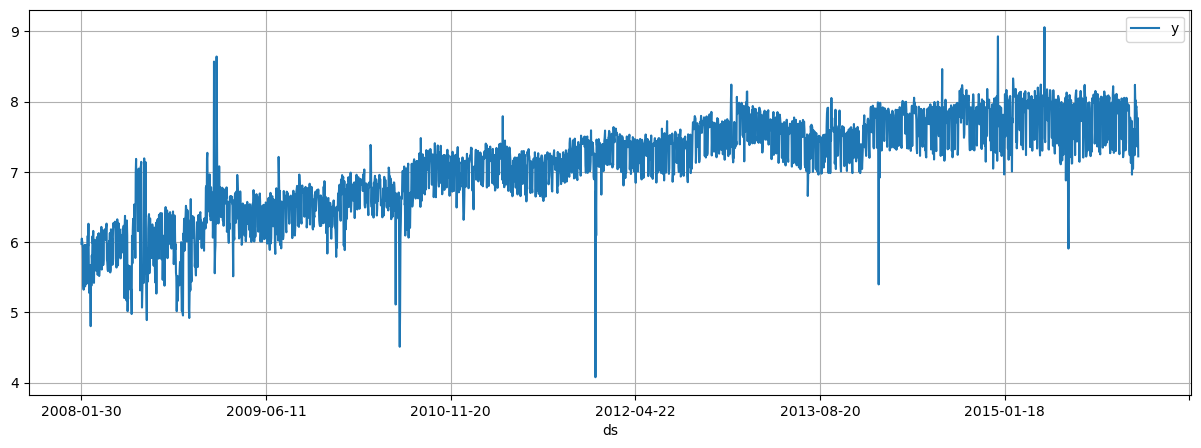

In [ ]:
df.plot(x='ds', y='y', figsize=(15, 5), grid=True)

 1.Построила модель с логистическим трендом с уровнем вместимости 9 и добавила учёт праздников США.

In [ ]:
df['cap'] = 9

In [ ]:
m = Prophet(growth='logistic')
m.fit(df)

10:16:20 - cmdstanpy - INFO - Chain [1] start processing
10:16:21 - cmdstanpy - INFO - Chain [1] done processing


2. Построила прогноз на год вперед и отобразила его вместе с точками перемены тренда

In [ ]:
futere = m.make_future_dataframe(periods=365)
futere['cap'] = 9

In [ ]:
forecast = m.predict(futere)

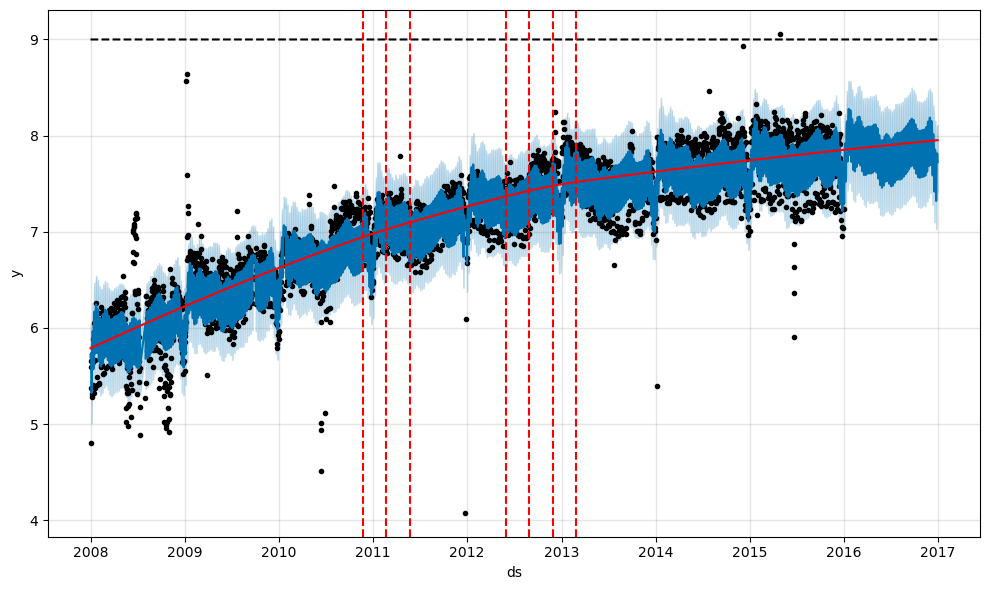

In [ ]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

Праздники

In [ ]:
# Создайте DataFrame с праздниками
New_Year = pd.DataFrame({
    'holiday': 'holiday',
    'ds': pd.to_datetime([
        '2023-01-01'

    ]),
    'lower_window': 0,
    'upper_window': 1,
})

Independence_Day = pd.DataFrame({
    'holiday': 'holiday',
    'ds': pd.to_datetime([
        '2023-07-04'
    ]),
    'lower_window': 0,
    'upper_window': 1,
})

Christmas = pd.DataFrame({
    'holiday': 'holiday',
    'ds': pd.to_datetime([
        '2023-12-25'
    ]),
    'lower_window': 0,
    'upper_window': 1,
})

holidays = pd.concat((New_Year, Independence_Day, Christmas))

holidays

,holiday,ds,lower_window,upper_window
0,holiday,2023-01-01,0,1
0,holiday,2023-07-04,0,1
0,holiday,2023-12-25,0,1


In [ ]:
m = Prophet(holidays=holidays)

m.add_country_holidays(country_name='US')

m.fit(df)

10:46:58 - cmdstanpy - INFO - Chain [1] start processing
10:47:00 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
m.train_holiday_names

0                         holiday
1                  New Year's Day
2                    Memorial Day
3                Independence Day
4                       Labor Day
5                    Veterans Day
6                Thanksgiving Day
7                   Christmas Day
8      Martin Luther King Jr. Day
9           Washington's Birthday
10                   Columbus Day
11    Independence Day (observed)
12      New Year's Day (observed)
13       Christmas Day (observed)
14        Veterans Day (observed)
dtype: object

NameError: name 'add_chagepoints_to_plot' is not defined

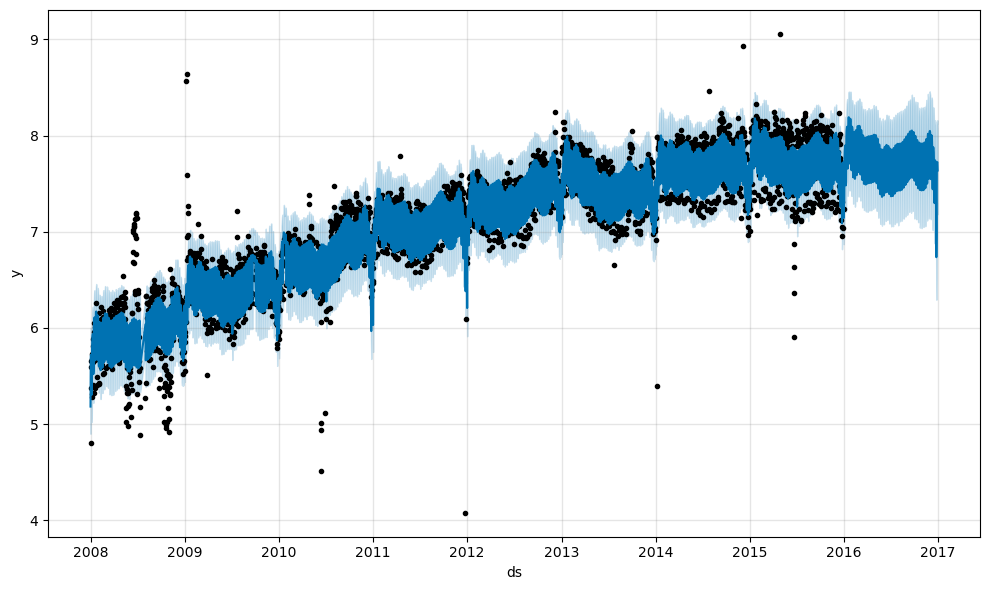

In [ ]:
future = m.make_future_dataframe(periods=365)

forecast = m.predict(future)

fig = m.plot(forecast)
a = add_chagepoints_to_plot(fig.gca(), m, forecast)

Можно попробовать разные параметры модели (например, changepoint_prior_scale), чтобы оценить влияние на точность прогноза.